<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2023 - Homework 01</h1>

<h3 style="color:blue">2023-03-27</h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

<h1 style="color:blue">Instructions</h1>

### Submissions: 

By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks 
will also be accepted but collaborative work is preferable). 

Please send me an **email** with the team members names as soon as you have formed it.

Only **one copy** of each group's work must be uploaded (by any member).

**Full names** and **email address** of all team members must appear in the header. 

### Format: 

A Jupyter or R Markdown **notebook,** with a **header** clearly stating the names of all contributors. 

### Documentation: 

Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

Do not be afraid of being too verbose or too elementary, explain as if to someone learning.

### External sources

Getting _inspiration_ from any book, document, blog, web page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,** understand every such material, and explain it in you own words, even more exhaustively.

Do not **copy/paste literally large chunks of code** I will detect it, believe me, even missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on Monday, April 17. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">01 - Stan version of a conjugate prior problem</h1>

<h2 style="color:blue">Modelling Earthquake Waiting Times</h2>

Consider the problem in `Exponential.02.Earthquake` (notebook in 2023-03-27 folder), where the goal is to study earthquake waiting times.

Likelihood is modelled as an $\expdist(\lambda)$ and $\lambda$ is given a conjugate prior, $\lambda\sim\gammadist(\alpha,\beta)$.

In the `Exponential.02.Earthquake` notebook some simulations are performed for:

01. Prior pdf for $\lambda$.
02. Prior predictive pdf for the waiting time.
03. Posterior pdf for $\lambda$.
04. Posterior predictive for new waiting time.

using known theoretical (analytical) descriptions of these distributions.

Your task is to redo these simulations using Stan (avoiding conjugate prior formulas), then compare your results to the analytical ones. 

Use this comparison to tune up adjustable parameters in Stan sampling, such as chain length. 

<h1 style="color:blue">02 - A more elaborate mixture prior for the spinning coin</h1>

(continued from Diaconis experiment)

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. 

Thus, a final approximation to the prior was taken as:

$$
    0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).
$$

Same observed data as in the previous model.

In [6]:
# Number of trials
n<-10
# Observed x
x.obs<-3

Perform a complete Bayesian analysis of this model, in close parallel to the first example.

(1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

(2) Using independent random numbers (`rbeta()` functions, etc.)

(3) JAGS version

(4)$ {}^{\star}$ Stan version. 

>$ (\star)$ Hint: this one **is difficult** due to intrinsic limitations in Stan:   
Stan does not allow integer parameters thus the JAGS code cannot be translated literally.  

>As a matter of fact even a Stan version of the two-components prior mixture in `Mixture.priors.02.ipynb` 
is tricky.   
There are several possible workarounds; try to find one but do not despair if you fail to develop a workable version.

Diaconis and Ylvisaker (1985) compare both mixture conjugate priors with a $ \operatorname{Unif}(0,1)$ prior with the data above. 

Comparing the MAP estimators, they observe that in a first approximation, they coincide, but spreads do depend on the prior.

They repeat the computations above with a larger sample. 

In [ ]:
n1<-50
x1.obs<-14

Their conclusion is that with small data, prior matters, but with larger samples, a finely tuned choice of prior is less important.

# Introduction of the model

We consider a Beta-Bernoulli model that makes use of a mixture of three Beta distributions as the approximation for the prior. </br> The independent experiments considered are modeled as a Binomial distribution of size n. 

In particular, the likelihood is:
$$x \sim \binomdist (\text{size}=n, \, \text{prob}=\theta)$$

and the prior distribution:
$$\theta \sim 0.50 \cdot \betadist(10,20) + 0.20 \cdot \betadist(15,15) + 0.30 \cdot \betadist(20,10) $$


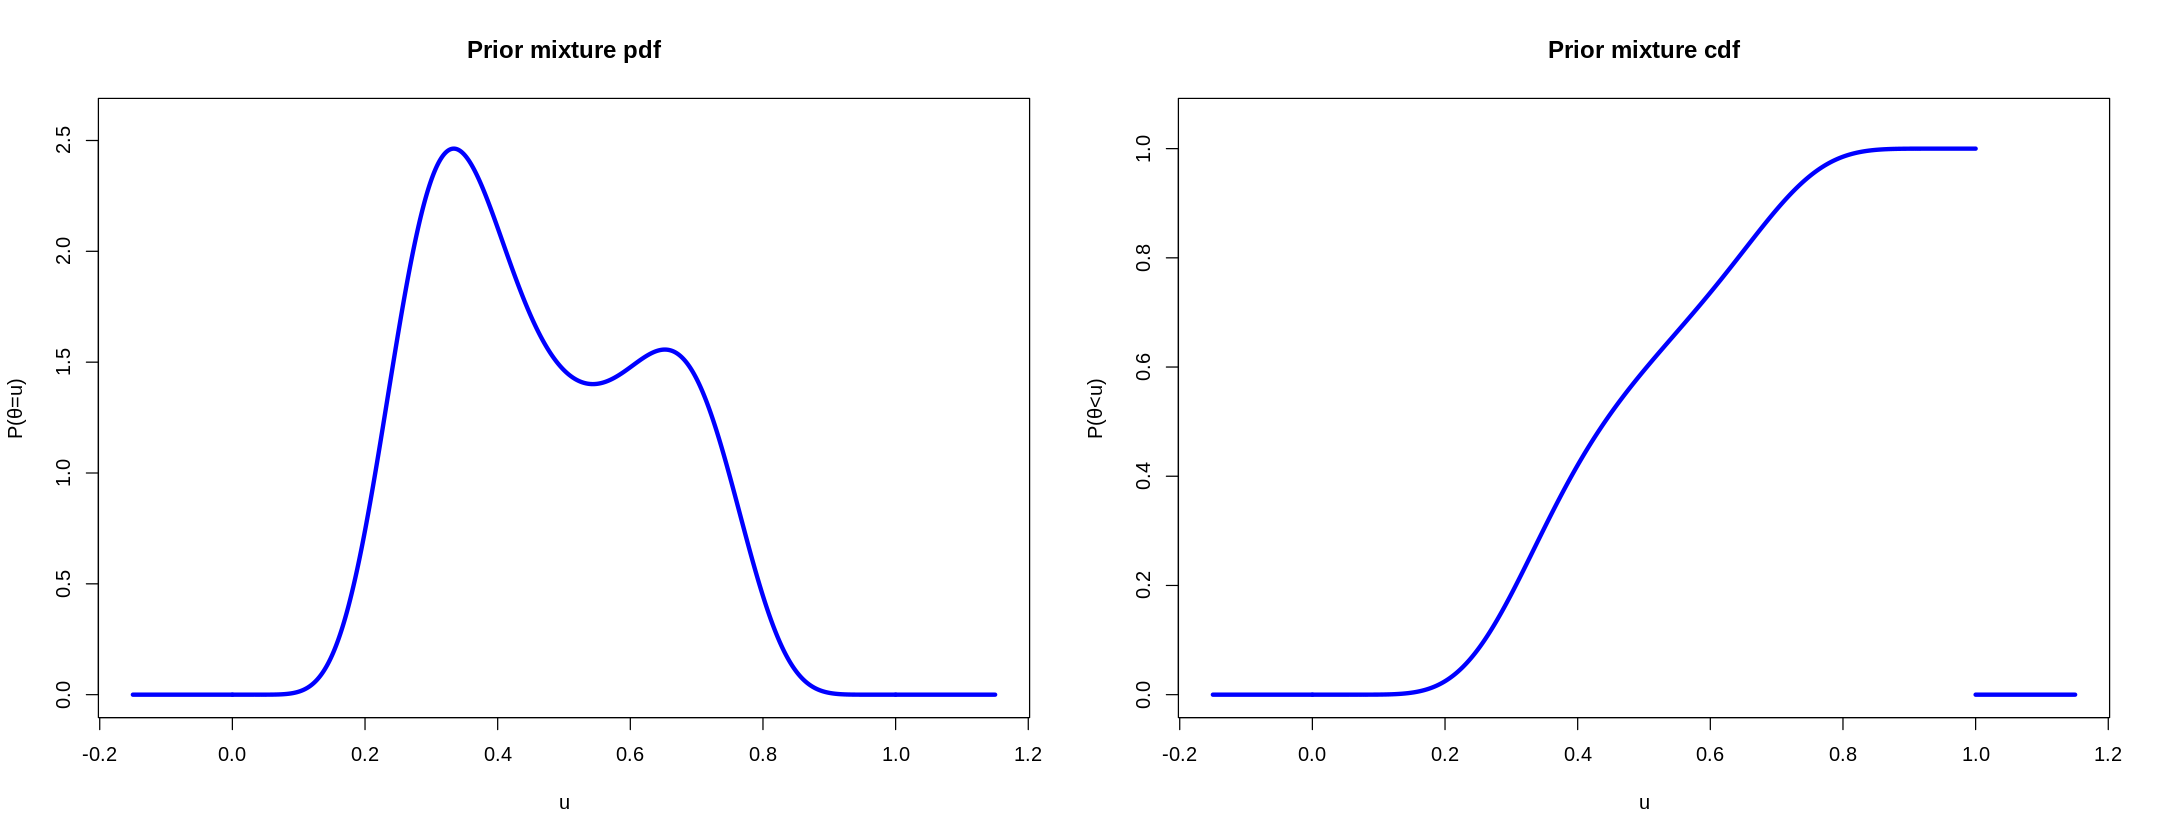

In [3]:
# Mixture prior: parameters definition -----------------------------------------
prior.alpha1<-10
prior.beta1<-20
prior.alpha2<-15
prior.beta2<-15
prior.alpha3<-20
prior.beta3<-10
prior.omega1<-0.5
prior.omega2<-0.2
prior.omega3<-0.3

# Define prior pdf -------------------------------------------------------------
  mixture.prior.pdf<-function(theta){
    return(prior.omega1*dbeta(theta,prior.alpha1,prior.beta1) + prior.omega2*dbeta(theta,prior.alpha2,prior.beta2) + prior.omega3*dbeta(theta,prior.alpha3,prior.beta3))
}

# Define prior cdf -------------------------------------------------------------
mixture.prior.cdf<-function(theta){
    return(prior.omega1*pbeta(theta,prior.alpha1,prior.beta1) + prior.omega2*pbeta(theta,prior.alpha2,prior.beta2) + prior.omega3*pbeta(theta,prior.alpha3,prior.beta3))
}

# Plot the prior pdf and cdf ---------------------------------------------------------
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))

u<-seq(0,1,length=1000)
v<-mixture.prior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="P(θ=u)",type="l",lwd=3.5,col="blue",main=sprintf("Prior mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

u<-seq(0,1,length=1000)
v<-mixture.prior.cdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="P(θ<u)",type="l",lwd=3.5,col="blue",main=sprintf("Prior mixture cdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

# Bayesian analysis of the model

## (1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

### Derivation of the posterior pdf and cdf

Given the stated approximation of the prior, we can define the prior pdf as:

$$ h(\theta) = \omega_1h_1(\theta)+\omega_2h_2(\theta)+\omega_3h_3(\theta) $$

And the likelihood given by the binomial as:

$$ f(x\mid \theta)= {{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}, \;\;\; x=0,1,\ldots,n $$

Then, the joint pdf is:

$$ f(x,\theta) = \omega_1f_1(x,\theta) + \omega_2f_2(x,\theta) + \omega_3f_3(x,\theta) $$

where:

$$ f_i(x,\theta) = f(x|\theta)\cdot h_i(\theta), \;\;\; i=1,2,3 $$

Integrating out $\theta$, the marginal for $x$:

$$ f(x) = \omega_1f_1(x) + \omega_2f_2(x) + \omega_3f_3(x) $$

where:

$$ f_i(x)=\int f(x|\theta)\cdot h_i(\theta)d\theta, \;\;\; i = 1,2,3 $$

Thus, the prior predictive pdf is a mixture of three _partial prior predictive pdf's,_ with the same coefficients, $ \omega_1$, $\omega_2$, and $\omega_3$ as the prior.

Now, to compute the *theoretical posterior pdf* we can use Bayes' formula:

$$ h(\theta|x) = \frac{f(x,\theta)}{f(x)} = \frac{\omega_1f_1(x,\theta) + \omega_2f_2(x,\theta) + \omega_3f_3(x,\theta)}{\omega_1f_1(x) + \omega_2f_2(x) + \omega_3f_3(x)} $$

And using the notation:

$$ h_{i}(\theta|x)=\frac{f_i(x,\theta)}{f_i(x)}\;\;\; i=1,2,3 $$

The posterior pdf is:

$$ h(\theta|x) = \hat{\omega}_1(x)h_1(\theta|x)+\hat{\omega}_2(x)h_2(\theta|x)+\hat{\omega}_3(x)h_3(\theta|x) $$

where $ \hat{\omega}_i(x) = k\omega_i f_i(x)$ and weighted so that the three constants add to 1.

Then, to obtain $f_i(x)$.

$$h_i(\theta,\alpha,\beta)=\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta=
\int_0^1 \left({{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}\right)
\left(\frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)d\theta=
$$
$$
={{n}\choose{x}}\frac{1}{B(\alpha,\beta)}\int_0^1 \theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}\int_0^1 h_i(\theta,\alpha+x,\beta+n-x)d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}
$$

And thus we have,

$$
h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}=\frac{B(\alpha,\beta)}{{{n}\choose{x}}B(\alpha+x,\beta+n-x)}
\frac{{{n}\choose{x}}}{B(\alpha,\beta)}\theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}=h_i(\theta,\alpha+x,\beta+n-x)
$$

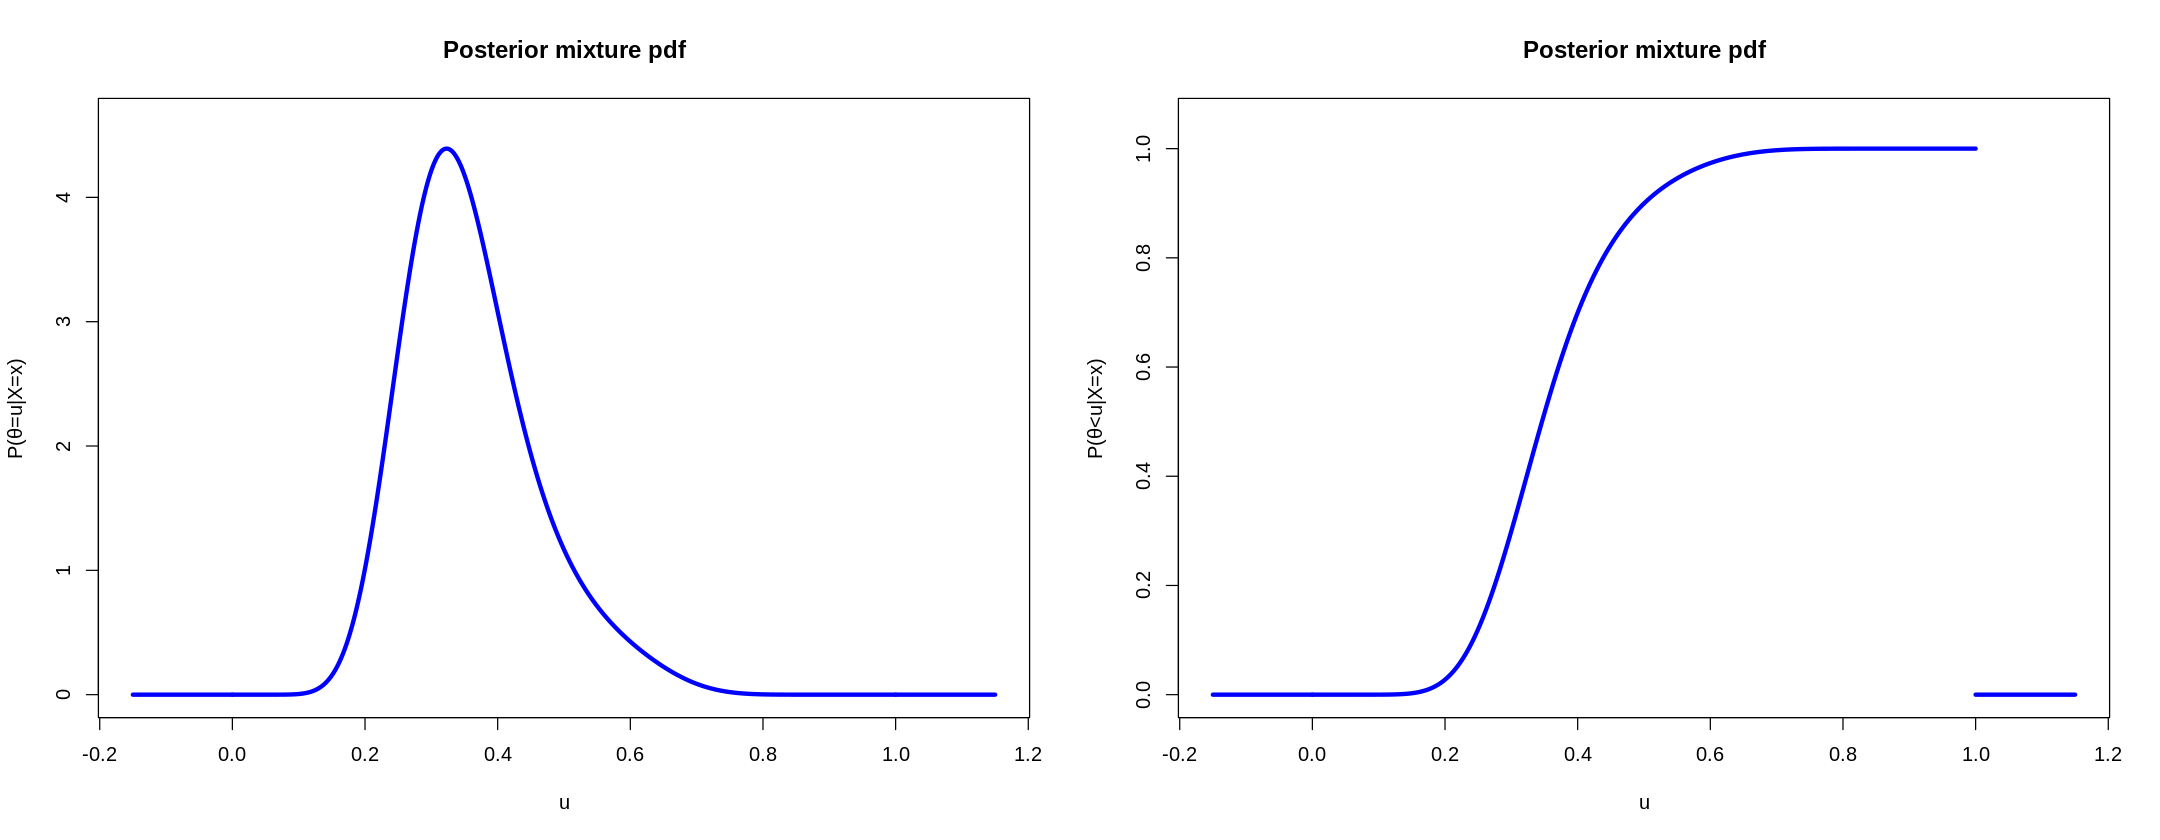

In [3]:
# Posterior: parameters definition ---------------------------------------------
posterior.alpha1<-prior.alpha1+x.obs
posterior.beta1<-prior.beta1+n-x.obs
posterior.alpha2<-prior.alpha2+x.obs
posterior.beta2<-prior.beta2+n-x.obs
posterior.alpha3<-prior.alpha3+x.obs
posterior.beta3<-prior.beta3+n-x.obs

# Marginals given the observation ----------------------------------------------
f1<-choose(n,x.obs)*beta(posterior.alpha1,posterior.beta1)/beta(prior.alpha1,prior.beta1)
f2<-choose(n,x.obs)*beta(posterior.alpha2,posterior.beta2)/beta(prior.alpha2,prior.beta2)
f3<-choose(n,x.obs)*beta(posterior.alpha3,posterior.beta3)/beta(prior.alpha3,prior.beta3)

# New normalized gamma functions -----------------------------------------------
posterior.omega1<-prior.omega1*f1
posterior.omega2<-prior.omega2*f2
posterior.omega3<-prior.omega3*f3
sum<-posterior.omega1+posterior.omega2+posterior.omega3
posterior.omega1<-posterior.omega1/sum
posterior.omega2<-posterior.omega2/sum
posterior.omega3<-posterior.omega3/sum

# Define posterior pdf ---------------------------------------------------------
mixture.posterior.pdf<-function(theta){
    return(posterior.omega1*dbeta(theta,posterior.alpha1,posterior.beta1)+posterior.omega2*dbeta(theta,posterior.alpha2,posterior.beta2)+posterior.omega3*dbeta(theta,posterior.alpha3,posterior.beta3))
}

# Define posterior cdf ---------------------------------------------------------
mixture.posterior.cdf<-function(theta){
    return(posterior.omega1*pbeta(theta,posterior.alpha1,posterior.beta1)+posterior.omega2*pbeta(theta,posterior.alpha2,posterior.beta2)+posterior.omega3*pbeta(theta,posterior.alpha3,posterior.beta3))
}

# Plot the posterior pdf and cdf -----------------------------------------------
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))

u<-seq(0,1,length=1000)
v<-mixture.posterior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="P(θ=u|X=x)",type="l",lwd=3.5,col="blue",main=sprintf("Posterior mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

u<-seq(0,1,length=1000)
v<-mixture.posterior.cdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="P(θ<u|X=x)",type="l",lwd=3.5,col="blue",main=sprintf("Posterior mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

Using these equations, we are able to perform a **theoretical analysis of posterior values**.

### MAP estimator of $\theta$

Direct calculation of the maximum value of a mixture distribution is not possible. Therefore, we will seek to determine the maximum value of the posterior probability density function.

[1] "Theoretical MAP: 0.323"


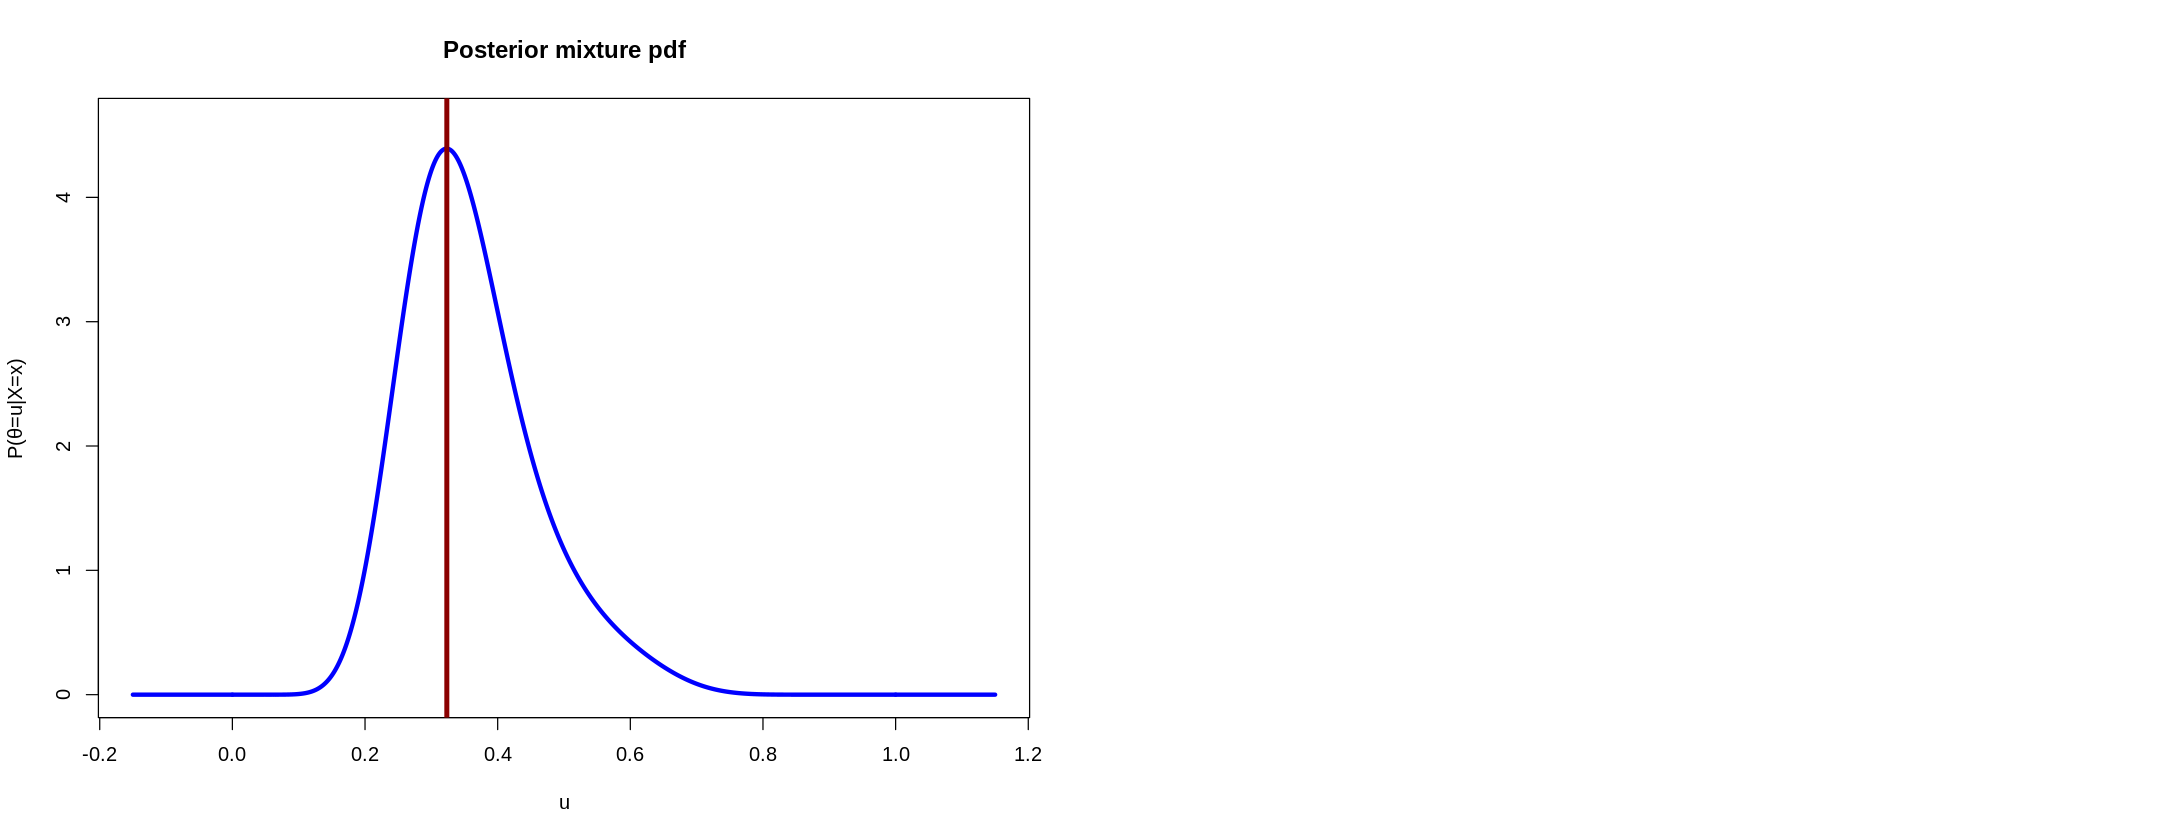

In [20]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.posterior.pdf(u)

Theor.MAP<-u[which.max(v)]

plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="P(θ=u|X=x)",type="l",lwd=3.5,col="blue",main=sprintf("Posterior mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

abline(v=Theor.MAP,col="DarkRed",lwd=4)

print(paste0("Theoretical MAP: ", round(Theor.MAP,3)))

### Posterior expectation

The expectation for a generic $Z \sim Beta(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$

In this case 

$$Z \sim \omega_1 Beta(\alpha_1,\beta_1) + \omega_2 Beta(\alpha_2,\beta_2) + \omega_3 Beta(\alpha_3,\beta_3)$$

Then

$$ E(Z) = \int \theta (\omega_1 Beta(\alpha_1,\beta_1) + \omega_2 Beta(\alpha_2,\beta_2) + \omega_3 Beta(\alpha_3,\beta_3))d\theta = \sum_{i=1}^{3} \omega_i \int \theta Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3} \omega_i E(Beta(\alpha_i,\beta_i)) $$

In [4]:
# Theoretical formulas posterior expectation -----------------------------------
Theor.Posterior.Expectation1<-(posterior.alpha1)/(posterior.alpha1+posterior.beta1)
Theor.Posterior.Expectation2<-(posterior.alpha2)/(posterior.alpha2+posterior.beta2)
Theor.Posterior.Expectation3<-(posterior.alpha3)/(posterior.alpha3+posterior.beta3)
Theor.Posterior.Expectation<-posterior.omega1*Theor.Posterior.Expectation1 + posterior.omega2*Theor.Posterior.Expectation2 + posterior.omega3*Theor.Posterior.Expectation3

print(paste0("Theoretical Posterior expectation: ",round(Theor.Posterior.Expectation,3)))

[1] "Theoretical Posterior expectation: 0.36"


### Posterior Variance

The variance for a generic $Z\sim Beta(\alpha,\beta)$ is $\text{var}(Z) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In this case, $Z\sim \omega_1 Beta(\alpha_1,\beta_1) + \omega_2 Beta(\alpha_2,\beta_2) + \omega_3 Beta(\alpha_3,\beta_3)$

Let $\theta^*$ be the expectation of $Z$ and $\theta_i^*,\;i=1,2,3$ the expectations of each $Beta(\alpha_i,\beta_i),\;i=1,2,3$ respectively, then we have:

$$ \text{var}(Z) = \int(\theta-\theta^*)\sum_{i=1}^{3} \omega_i Beta(\alpha_i,\beta_i)d\theta = \int\sum_{i=1}^{3}(\theta-\theta^*+\theta_i^*-\theta_i^*)\omega_i Beta(\alpha_i,\beta_i)d\theta = \int\sum_{i=1}^{3}((\theta-\theta_i^*)^2+(\theta_i^*-\theta^*)^2+2(\theta-\theta_i^*)(\theta_i^*-\theta^*))\omega_i Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3} \omega_i \int (\theta-\theta_i^*)^2 Beta(\alpha_i,\beta_i)d\theta + \sum_{i=1}^{3} \omega_i(\theta_i^* - \theta^*)^2 \int Beta(\alpha_i,\beta_i)d\theta + 2\sum_{i=1}^{3}\omega_i(\theta_i^* - \theta^*) \int (\theta-\theta_i^*)Beta(\alpha_i,\beta_i)d\theta = \sum_{i=1}^{3}\omega_i \text{var}(Beta(\alpha_i,\beta_i)) + \sum_{i=1}^{3}\omega_i (\theta_i^*-\theta^*)^2 + 2 \sum_{i=1}^{3}\omega_i (\theta_i^*-\theta^*)(E(Beta(\alpha_i,\beta_i))-\theta_i^*) = \sum_{i=1}^{3}\omega_i \text{var}(Beta(\alpha_i,\beta_i)) + \sum_{i=1}^{3}\omega_i (\theta_i^*-\theta^*) $$

In [5]:
# Theoretical formulas posterior variance --------------------------------------
Theor.Posterior.Variance1<-(posterior.alpha1*posterior.beta1)/((posterior.alpha1+posterior.beta1)^2*(posterior.alpha1+posterior.beta1+1))
Theor.Posterior.Variance2<-(posterior.alpha2*posterior.beta2)/((posterior.alpha2+posterior.beta2)^2*(posterior.alpha2+posterior.beta2+1))
Theor.Posterior.Variance3<-(posterior.alpha3*posterior.beta3)/((posterior.alpha3+posterior.beta3)^2*(posterior.alpha3+posterior.beta3+1))

Theor.Posterior.Variance<-posterior.omega1*Theor.Posterior.Variance1 + posterior.omega2*Theor.Posterior.Variance2 + posterior.omega3*Theor.Posterior.Variance3 + 
  posterior.omega1*(Theor.Posterior.Expectation1-Theor.Posterior.Expectation)^2 + posterior.omega2*(Theor.Posterior.Expectation2-Theor.Posterior.Expectation)^2 + posterior.omega3*(Theor.Posterior.Expectation3-Theor.Posterior.Expectation)^2

print(paste0("Theoretical Posterior variance: ",round(Theor.Posterior.Variance,3)))

[1] "Theoretical Posterior variance: 0.01"


## (2) Using independent random numbers (`rbeta()` functions, etc.)

We now aim to produce an equivalent analysis utilizing R programming language and the independent random numbers through functions such as `rbeta` and `rbinom`.

Initially, we shall specify the parameters of the problem to be addressed.

In [2]:
sample_size <- 20000 # Number of experiments that are performed
n_throws <- 10 # Number of times each coin is tossed (n)
m_heads <- 3 # Number of heads observed (x.obs)

We will commence by generating 20,000 theta values by sampling from the distribution characterized by the problem.

To accomplish this, we will initially randomly specify the beta distribution of each coin, assigning each distribution its corresponding probability.

Next, utilizing the `rbeta` function, we will generate the corresponding theta value for each coin.

To conclude the analysis, we will construct a histogram that represents the distribution of the generated theta values.

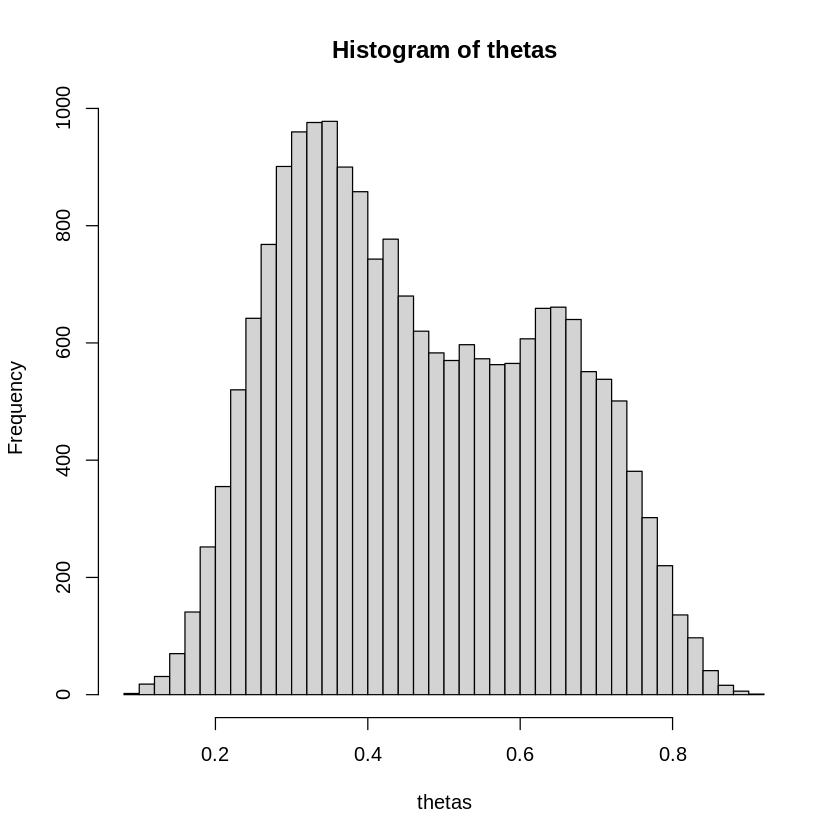

In [3]:
# Assign from which theta distribution we will pick each coin
source_beta <- sample(c(1,2,3), replace = TRUE, size = sample_size, prob=c(0.5, 0.2, 0.3))

# Generate thetas values picking coins from the corresponding beta distribution
thetas <- c(rbeta(sample_size,10,20)[source_beta == 1], 
            rbeta(sample_size,15,15)[source_beta == 2], 
            rbeta(sample_size,20,10)[source_beta == 3])

# Simulated prior
hist(thetas, breaks=50)

Subsequently, we will proceed to flip each coin m times, resulting in a binomial distribution for each flip, with the corresponding theta value assigned to each coin being utilized as the probability.

The following cell will produce a table comprising the frequency of heads acquired, in addition to the prior predictive probability mass function (pmf) for the simulation.

[1] "Absolute frequency of m heads:"


heads
   0    1    2    3    4    5    6    7    8    9   10 
 350 1170 2166 2920 3196 3020 2531 2299 1430  731  187 

[1] "Relative frequency of m heads:"


heads
      0       1       2       3       4       5       6       7       8       9 
0.01750 0.05850 0.10830 0.14600 0.15980 0.15100 0.12655 0.11495 0.07150 0.03655 
     10 
0.00935 

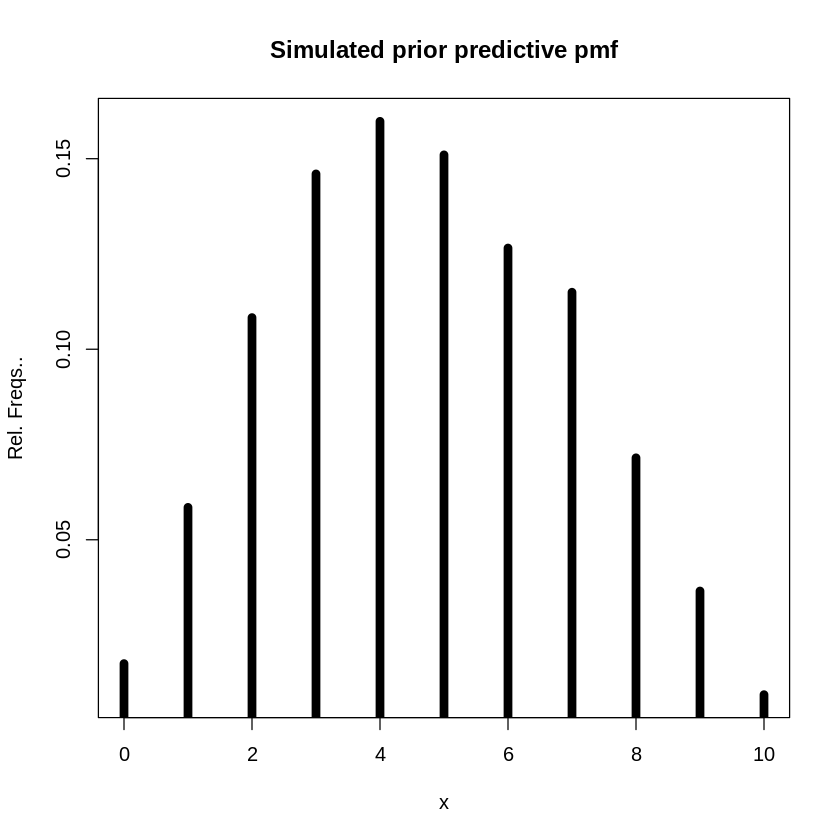

In [4]:
# Number of heads in m trials
heads <- rbinom(n = sample_size, size = n_throws, prob = thetas)

# Absolute frequencies
print("Absolute frequency of m heads:")
table(heads)
# Relative frequencies. 
# The relative frequency of 3 heads is the X-marginal for X=m=3.
# Obtaining m=3 heads is not the most likely outcome, based on this prior
print("Relative frequency of m heads:")
f <- table(heads)/sum(table(heads))
f
matplot(x=names(f),y=f,type="h",lwd=7, lty=1,
        xlab="x",ylab="Rel. Freqs..",
        main="Simulated prior predictive pmf")

To further investigate the likelihood of obtaining three heads (m=3) given theta, we will isolate all instances in which three heads were flipped.

Following this, we will create a histogram that represents the distribution of theta values that produced m=3 heads.

[1] "Proportion of samples with m=3 heads: 0.146"


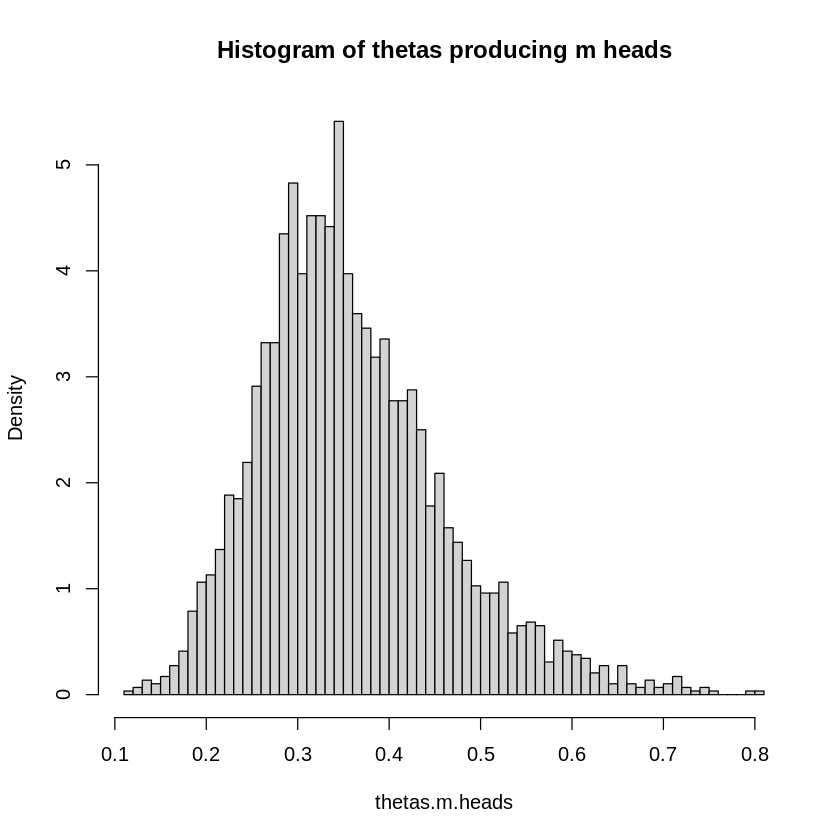

In [5]:
# Cases in which we get m=3 heads
m.heads.idx <- heads == m_heads

# Proportion of cases in which we get m=3 heads
print(paste0("Proportion of samples with m=3 heads: ", sum(m.heads.idx)/length(m.heads.idx)))

# Thetas that have generated m=3 heads
thetas.m.heads <- thetas[m.heads.idx]

# The histogram shows the theta values generating m=3 heads
hist(thetas.m.heads, breaks=50, freq=FALSE, main = "Histogram of thetas producing m heads")

Based on the results of the preceding experiments, we can now perform an **analysis of the posterior quantities**.

### Estimation of Maximum a Posteriori (MAP) for $\theta$

Utilizing the previous simulation, we can estimate the value of the MAP as the theta value that corresponds to the highest density.

[1] "Simulated MAP: 0.329"


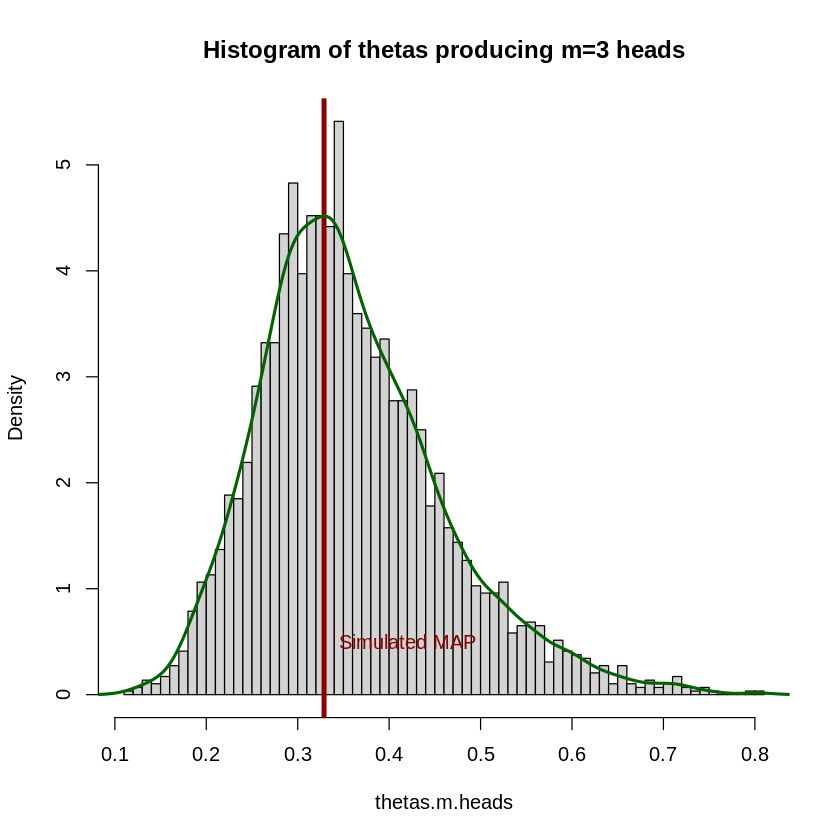

In [6]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
thetas.m.heads.density <-density(thetas.m.heads)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]

# Plot over histogram
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m=3 heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

### Posterior Expectation
As demonstrated in the following cell, we can use the results of the simulation to estimate the posterior expectation for theta.

In [7]:
# Simulated Expectation 
print(paste0("Simulation based posterior expectation: ",round(mean(thetas.m.heads),3)))

[1] "Simulation based posterior expectation: 0.359"


### Posterior Variance
The following cell illustrates how we can estimate the posterior variance for theta based on the results of the simulation.

In [ ]:
# Simulated Variance
print(paste0("Simulation based posterior variance: ",round(var(thetas.m.heads),3)))

## (3) JAGS version

Now to conduct our analysis we will be utilizing a simulation model for Bayesian hierarchical models with Markov Chain Monte Carlo, called JAGS.

Before proceeding with the analysis, we must ensure that the R2jags package is installed correctly and loaded into our notebook.

In [12]:
# Loading R2jags
require(R2jags)

Loading required package: R2jags

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R2jags’”


Once we have installed and loaded the R2jags package correctly, we can proceed to load our data into a list. This list will be used in our JAGS model for simulation and analysis.

In [7]:
# List of parameters of our model, loaded before.
Mix.01.dat<-list(a1=prior.alpha1,b1=prior.beta1,a2=prior.alpha2,b2=prior.beta2,b3=prior.beta3,a3=prior.alpha3
                 ,omega1=prior.omega1,omega2=prior.omega2,omega3=prior.omega3,n=n,x=x.obs)

# JAGS model
cat(
"model
    {
    x~dbin(p,n)            
    p<-theta[r]
    r~dcat(g[])
    theta[1]~dbeta(a1,b1) 
    theta[2]~dbeta(a2,b2)
    theta[3]~dbeta(a3,b3)
    g[1]<-omega1
    g[2]<-omega2
    g[3]<-omega3
    }"
    ,file="Mix.01.jag")

We will now utilize our mixture1 data and JAGS model to conduct simulations for analysis. By default, we will use the following variables in our JAGS model:

* Number of chains = 4
* Number of iterations = 3500
* Number of burn-in iterations = 500

In [9]:
Mix.01.m1<-jags(data=Mix.01.dat, n.chains=4,n.iter=3500,n.burnin=500, 
        parameters.to.save=c("theta","p"), model.file="Mix.01.jag")

ERROR: ignored

In [10]:
print(Mix.01.m1)

ERROR: ignored

#### Traceplot to assess stationarity of the chains

After conducting our simulations, we can display the traceplot. The traceplot shows a plot of iterations vs. sampled values for each variable in the chain, with a separate plot per variable.

In [ ]:
options(repr.plot.width=15,repr.plot.height=5)
traceplot(Mix.01.m1)

Once we have displayed the traceplot, we can obtain a sample and plot the Estimated Posterior Probability Density Function (PDF) of that sample.

In [ ]:
p.sample<-Mix.01.m1$BUGSoutput$sims.list$p

In [ ]:
# Posterior PDF plot
p.sample.density<-density(p.sample)
plot(p.sample.density,lwd=2.5,col="blue",main=expression(paste("Estimated Posterior PDF")),cex.main=1.6)

Based on the experiments conducted, we are now able to perform an **analysis of the posterior quantities**.

### MAP estimator of $\theta$

Using the simulations performed earlier, we can estimate the MAP for $\theta$ as the value with the highest density.

In [ ]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
thetas.m.heads<-p.sample
thetas.m.heads.density <-density(p.sample)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]

# Plot over histogram
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

### Posterior Expectation
Once again, the simulations enable us to compute the posterior expectation, as demonstrated in the following cell.

In [ ]:
# Simulated Expectation 
print(paste0("Simulation based posterior expectation: ",round(mean(thetas.m.heads),3)))

### Posterior Variance
In addition to the posterior expectation, we can also compute the posterior variance, as shown in the following cell.

In [ ]:
# Simulated Variance
print(paste0("Simulation based posterior variance: ",round(var(thetas.m.heads),3)))

## (4)$ {}^{\star}$ Stan version